In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv("/content/drive/MyDrive/nearest-earth-objects(1910-2024).csv")

In [5]:
data.head()

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
0,2162117,162117 (1998 SD15),19.14,0.394962,0.883161,Earth,71745.401048,5.814362e+07,False
1,2349507,349507 (2008 QY),18.50,0.530341,1.185878,Earth,109949.757148,5.580105e+07,True
2,2455415,455415 (2003 GA),21.45,0.136319,0.304818,Earth,24865.506798,6.720689e+07,False
3,3132126,(2002 PB),20.63,0.198863,0.444672,Earth,78890.076805,3.039644e+07,False
4,3557844,(2011 DW),22.70,0.076658,0.171412,Earth,56036.519484,6.311863e+07,False


In [6]:
data.describe(include='all')

,neo_id,name,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,orbiting_body,relative_velocity,miss_distance,is_hazardous
count,3.381990e+05,338199,338171.000000,338171.000000,338171.000000,338199,338199.000000,3.381990e+05,338199
unique,NaN,33514,NaN,NaN,NaN,1,NaN,NaN,2
top,NaN,277810 (2006 FV35),NaN,NaN,NaN,Earth,NaN,NaN,False
freq,NaN,211,NaN,NaN,NaN,338199,NaN,NaN,295037
mean,1.759939e+07,NaN,22.932525,0.157812,0.352878,NaN,51060.662908,4.153535e+07,NaN
std,2.287225e+07,NaN,2.911216,0.313885,0.701869,NaN,26399.238435,2.077399e+07,NaN
min,2.000433e+06,NaN,9.250000,0.000511,0.001143,NaN,203.346433,6.745533e+03,NaN
25%,3.373980e+06,NaN,20.740000,0.025384,0.056760,NaN,30712.031471,2.494540e+07,NaN
50%,3.742127e+06,NaN,22.800000,0.073207,0.163697,NaN,47560.465474,4.332674e+07,NaN
75%,5.405374e+07,NaN,25.100000,0.189041,0.422708,NaN,66673.820614,5.933961e+07,NaN


In [7]:
data.info()
data.isnull().sum()
data = data.drop(['neo_id','name','orbiting_body'],axis = 1)
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338199 entries, 0 to 338198
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   neo_id                  338199 non-null  int64  
 1   name                    338199 non-null  object 
 2   absolute_magnitude      338171 non-null  float64
 3   estimated_diameter_min  338171 non-null  float64
 4   estimated_diameter_max  338171 non-null  float64
 5   orbiting_body           338199 non-null  object 
 6   relative_velocity       338199 non-null  float64
 7   miss_distance           338199 non-null  float64
 8   is_hazardous            338199 non-null  bool   
dtypes: bool(1), float64(5), int64(1), object(2)
memory usage: 21.0+ MB


,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,False
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,True
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,False
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,False
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,False


In [8]:
data['is_hazardous'] = data['is_hazardous'].map({True:1 , False:0})
data.head()

,absolute_magnitude,estimated_diameter_min,estimated_diameter_max,relative_velocity,miss_distance,is_hazardous
0,19.14,0.394962,0.883161,71745.401048,5.814362e+07,0
1,18.50,0.530341,1.185878,109949.757148,5.580105e+07,1
2,21.45,0.136319,0.304818,24865.506798,6.720689e+07,0
3,20.63,0.198863,0.444672,78890.076805,3.039644e+07,0
4,22.70,0.076658,0.171412,56036.519484,6.311863e+07,0


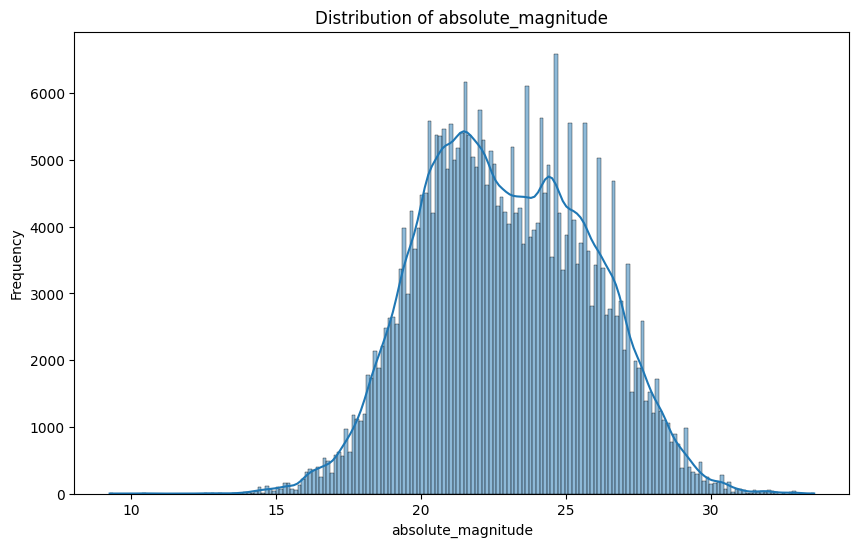

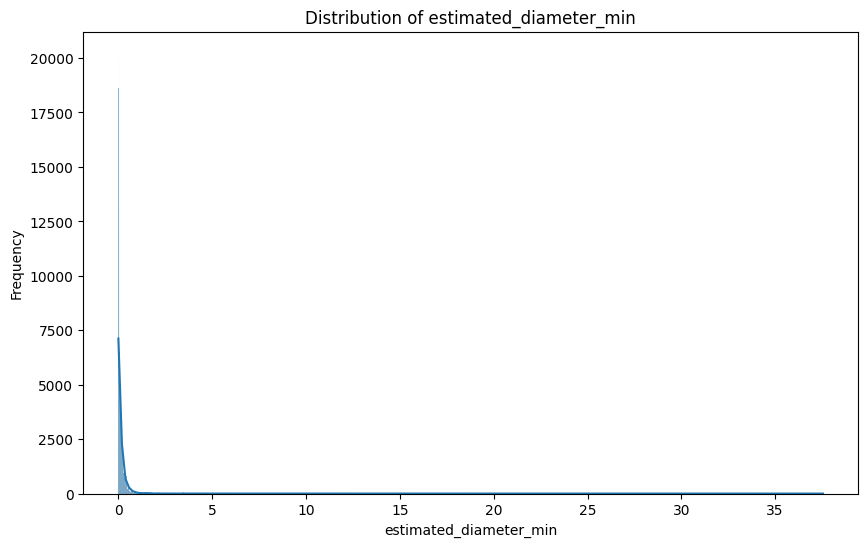

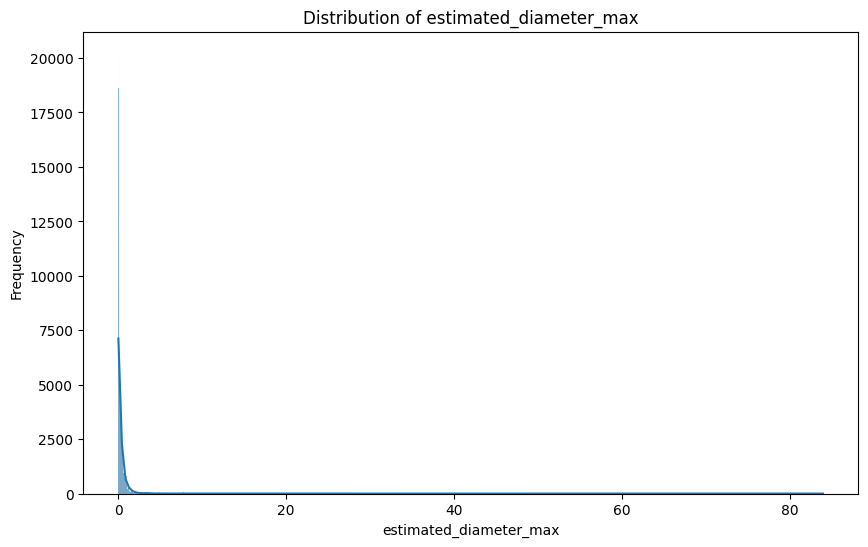

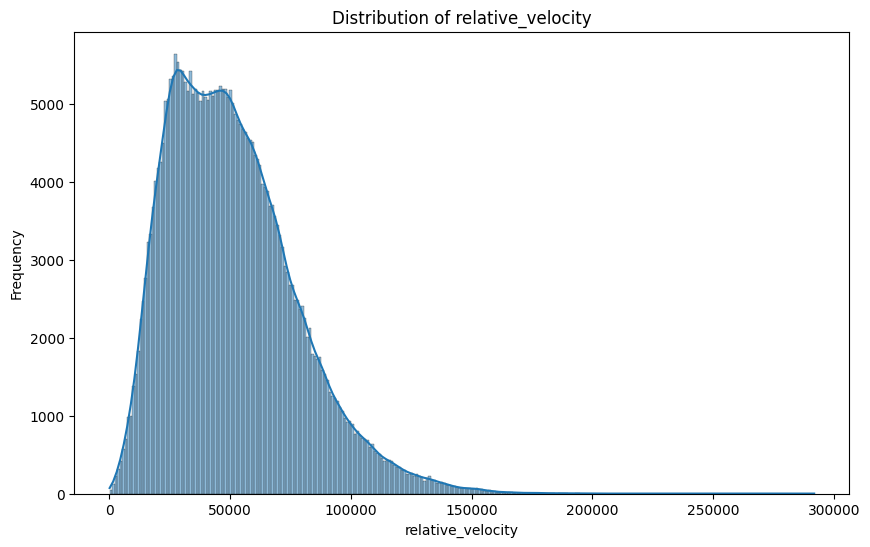

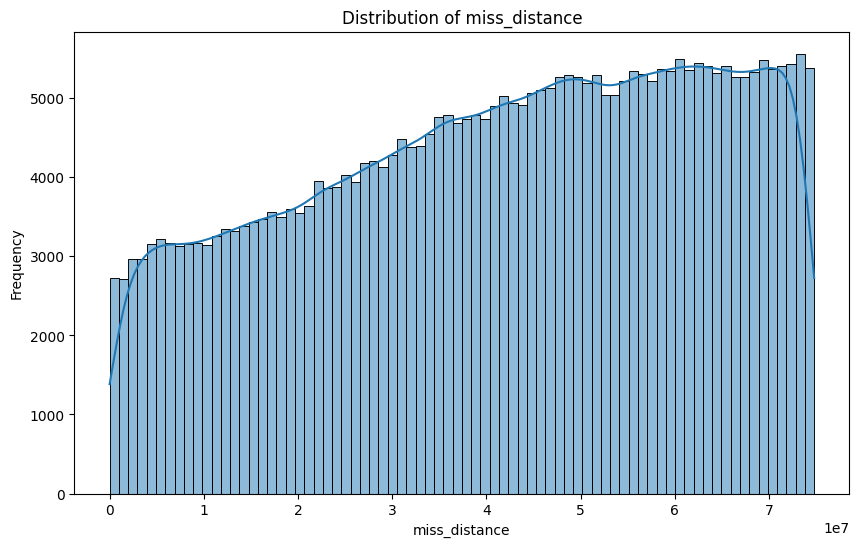

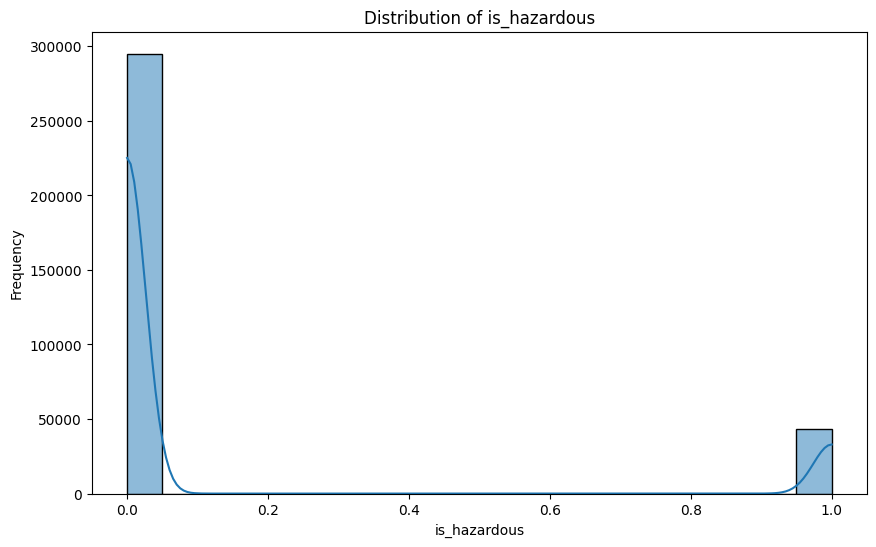

In [10]:
columns = data.columns

# Plot each column
for col in columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

data = data.dropna()

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = data.drop('is_hazardous',axis = 1)
y = data['is_hazardous']

x_scaled = scaler.fit_transform(x)
print(x_scaled)

print(x)
print(y)

[[-1.30273056  0.75553115  0.75553115  0.78354069  0.79946485]
 [-1.52257027  1.18683296  1.18683296  2.23068176  0.68670052]
 [-0.50924664 -0.06847576 -0.06847576 -0.9922207   1.2357423 ]
 ...
 [-0.34814535 -0.15283782 -0.15283782 -1.48591476  0.5740475 ]
 [ 0.32786173 -0.36139181 -0.36139181  0.19463588 -1.7498115 ]
 [ 0.00634617 -0.28520788 -0.28520788 -0.34089772 -1.65633252]]
        absolute_magnitude  estimated_diameter_min  estimated_diameter_max  \
0                   19.140                0.394962                0.883161   
1                   18.500                0.530341                1.185878   
2                   21.450                0.136319                0.304818   
3                   20.630                0.198863                0.444672   
4                   22.700                0.076658                0.171412   
...                    ...                     ...                     ...   
338194              28.580                0.005112                0.01

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.2 , random_state = 42)
print(X_train)

[[-1.45387036  1.03816614  1.03816614  2.94555792  0.99482004]
 [-0.06269724 -0.26410792 -0.26410792 -0.46793005 -1.1647807 ]
 [ 1.34908585 -0.46681368 -0.46681368 -0.82639138  0.31651595]
 ...
 [-0.49894165 -0.07443451 -0.07443451 -1.06662046  1.26623063]
 [ 1.56892556 -0.47599238 -0.47599238 -1.10754607  0.68708169]
 [ 1.39717579 -0.46905877 -0.46905877  0.32777902  1.30049185]]


In [13]:
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(n_neighbors=10)
Knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
y_pred = Knn.predict(X_test)

In [16]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8851630073186959
